# Решающие деревья

### О задании

Задание состоит из трех независимых разделов, посвященных bias-variance decomposition, решающим деревьям и композициям алгоритмов. Эти разделы можно выполнять в любом порядке. В каждом разделе вам предложена одна или две задачи, которые, в свою очередь, делятся на пункты. Баллы даются за выполнение пунктов, причем в рамках одной задачи пункты, как правило, зависимы (нельзя решить следующий, не решив предыдущего). Пункты могут быть двух видов: написать скрипт или ответить на вопросы. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании. В разных задачах используются разные наборы данных, все наборы взяты из репозитория UCI или из соревнования с платформы kaggle. 

Задание направлено на более глубокое ознакомление с тем, как работают решающие деревья, случайные леса и как устроено разложение на смещение и разброс. Кроме того, задание предполагает проведение экспериментов и анализ их результатов (мини-исследования). 


#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20      # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

Text(0, 0.5, 'y')

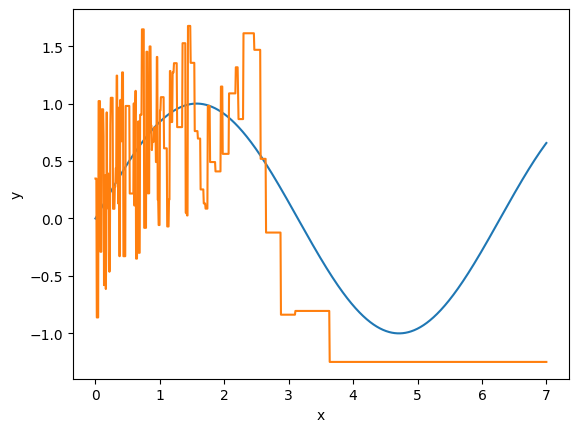

In [10]:
from sklearn.tree import DecisionTreeRegressor

X = np.random.exponential(size=sample_size)

noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = f(X) + noise

X = np.reshape(X, (-1, 1))
y = np.reshape(y, (-1, 1))

tree = DecisionTreeRegressor()

tree.fit(X, y)

true_results = []
desicion_tree_results = []

for x in linspace:
    true_results.append(f(x))
    desicion_tree_results.append(tree.predict([[x]])[0])

plt.plot(linspace, true_results, label="f(x)")
plt.plot(linspace, desicion_tree_results, label="decision tree prediction")
plt.xlabel("x")
plt.ylabel("y")

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

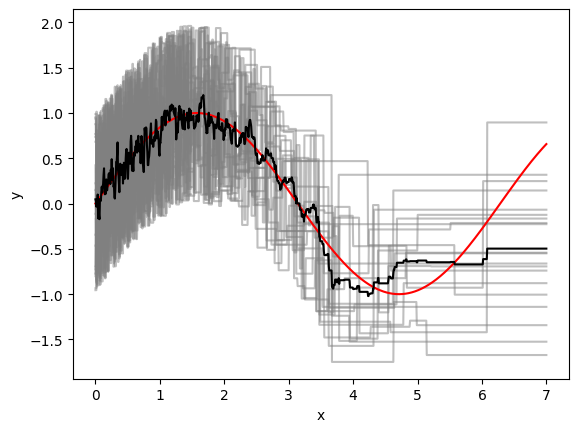

In [11]:
def depth(maximum_depth = None):
    trees = []
    for _ in range(samples_num):
        X = np.random.exponential(size=sample_size)
        noise = np.random.uniform(low=-1, high=1, size=sample_size)
        y = f(X) + noise
        X = np.reshape(X, (-1, 1))
        y = np.reshape(y, (-1, 1))

        desicion_tree_results = []

        tree = DecisionTreeRegressor(max_depth=maximum_depth)

        tree.fit(X, y)

        for x in linspace:
            desicion_tree_results.append(tree.predict([[x]])[0])

        plt.plot(linspace, desicion_tree_results, color="gray", alpha = 0.5)
        plt.xlabel("x")
        plt.ylabel("y")

        trees.append(tree)

    true_results = []
    average_results = []
    for x in linspace:
        true_results.append(f(x))
        average_results.append(0)
        for tree in trees:
            average_results[-1] += tree.predict([[x]])[0]
        average_results[-1] =  0 if samples_num == 0 else average_results[-1] / samples_num
    plt.plot(linspace, true_results, color="red")
    plt.plot(linspace, average_results, color="black")


depth(None)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

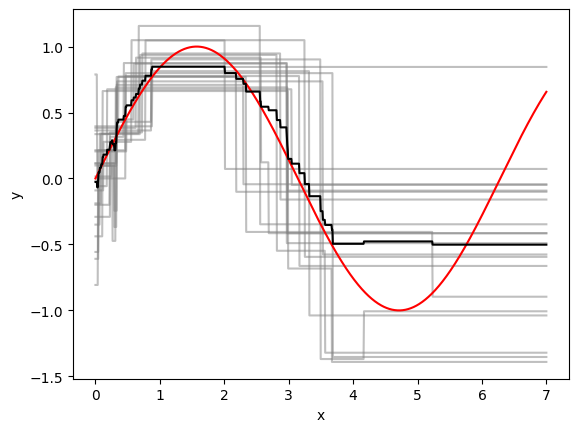

In [12]:
depth(2)

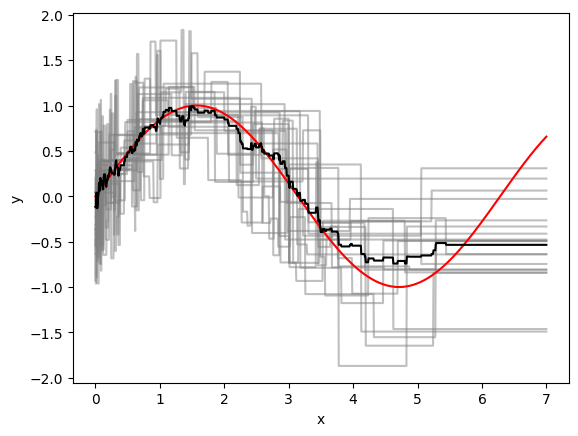

In [13]:
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:** При x > 4.5, у нас на всех графиках решающее дерево сильно не совпадает с графиком f(x), это связано с тем, что обучающая выборка, при которой x > 4.5 не очень большая, и у деревьев слишком мало данных для верной классификации, поэтому рассмотрим график при x <= 4.5.

- При max_depth = 2, график средних значений деревьев чем - то похож на f(x) = sin(x), но на некоторых промежутках смещение большое.

- При max_depth = None, график средних значений деревьев сильно "прыгает" (примерно на +-0.15) на отрезке [0;3], поэтому смещение явно не 0.

- А вот при max_depth = 4, график средних значений деревьев похож на график f(x) и среди всех остальных его смещение меньше и близко к нулю.

Ответ: при max_depth = 4


### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
import pandas as pd
data = pd.read_csv('students.csv') # i changed name from " UNS" to "UNS"
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [15]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from 'c:\\Users\\vinik\\Githubik\\ml-homework\\task7_dstree_practice\\hw3code.py'>

<Figure size 640x480 with 0 Axes>

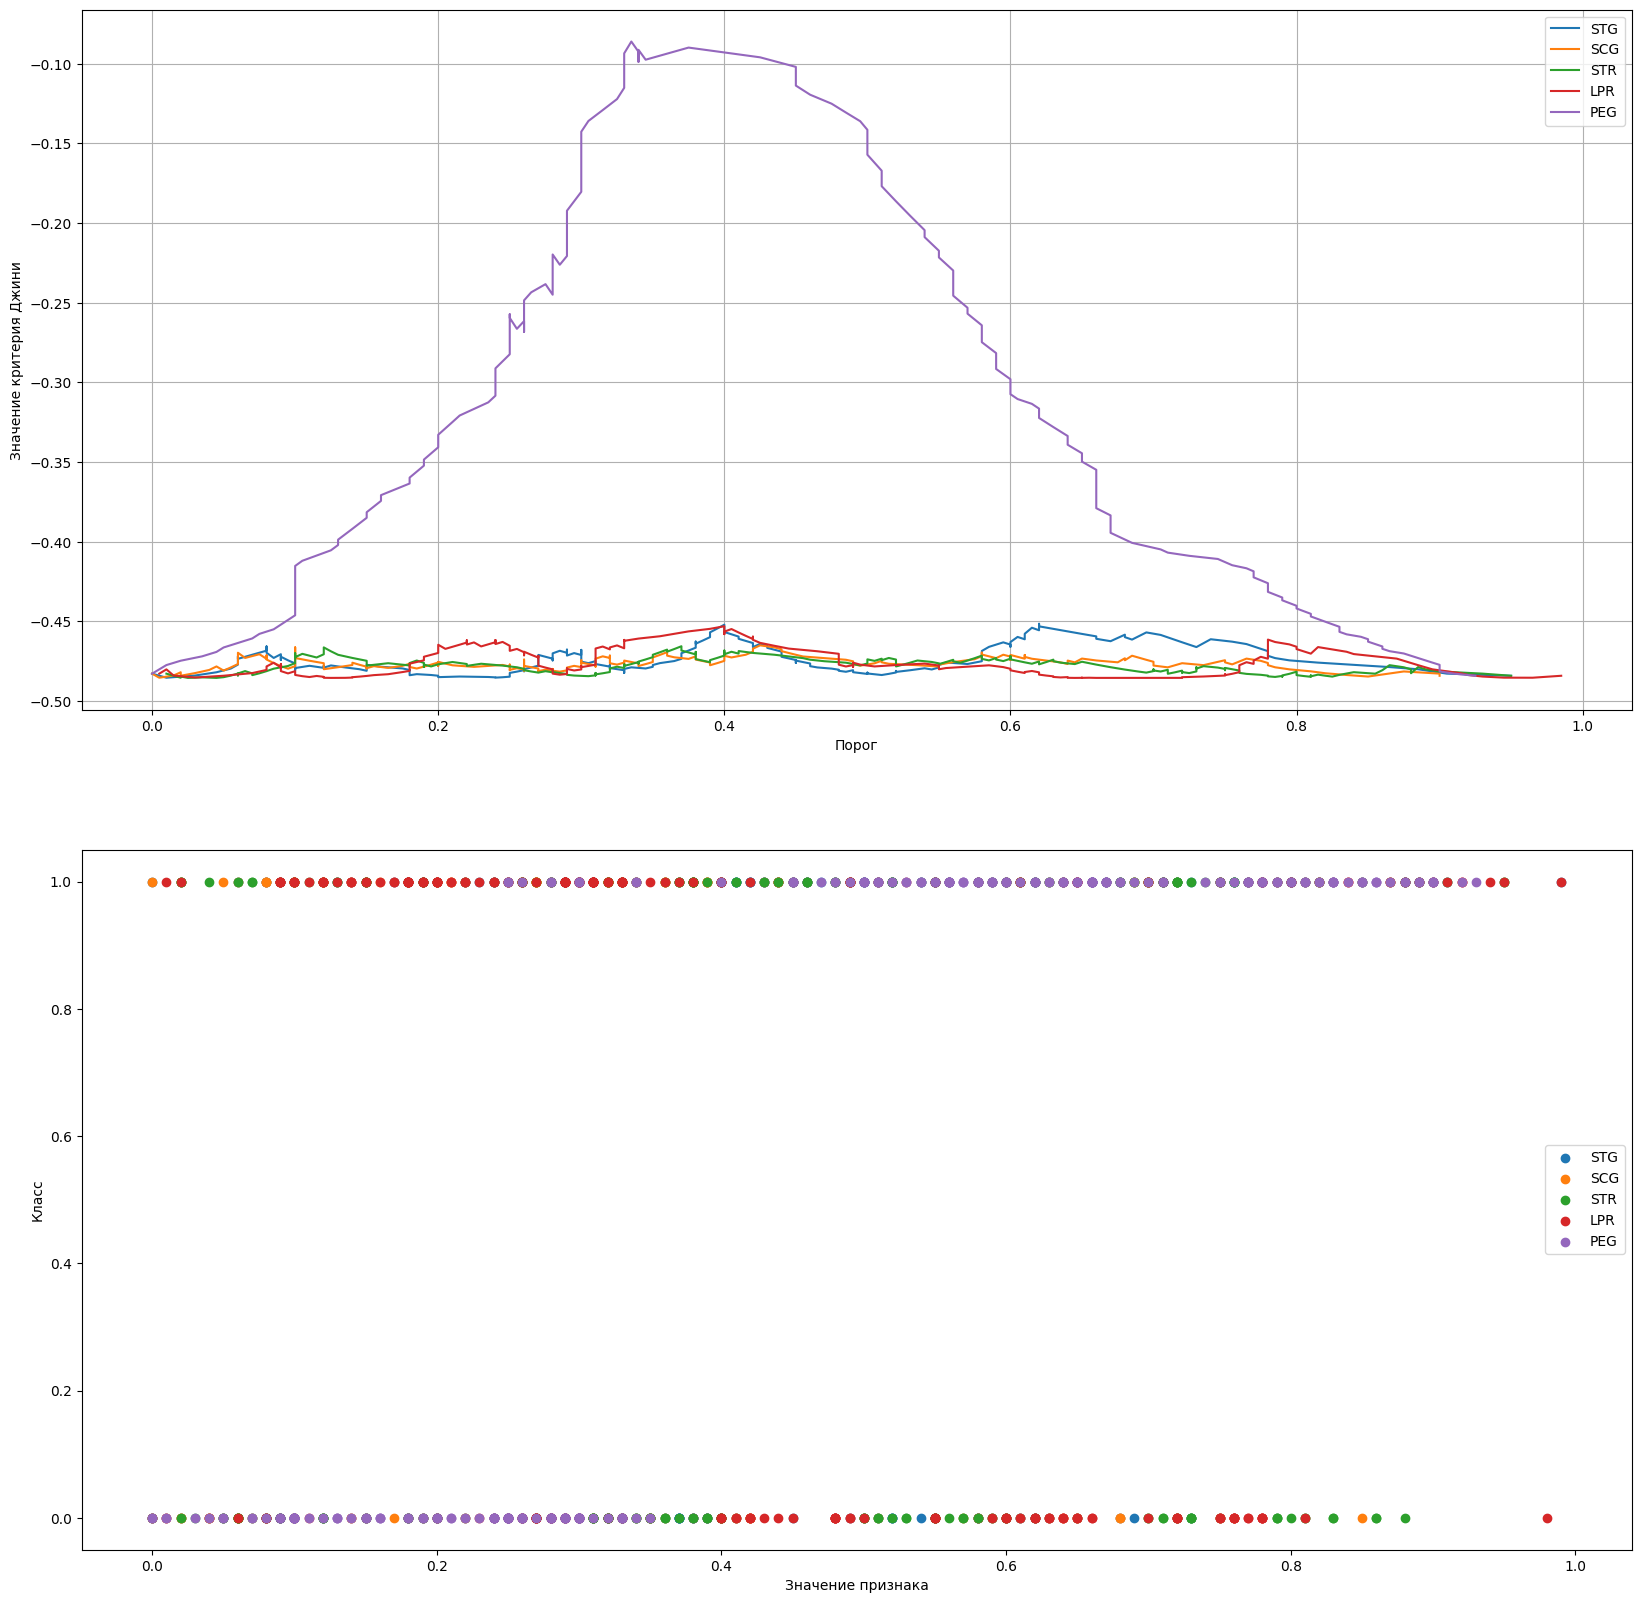

In [16]:
plt.figure()

target = np.copy(data['UNS'])

X = data.drop("UNS", axis=1)

fig, axs = plt.subplots(2, 1, figsize=(20, 20))

axs[0].set_xlabel("Порог")
axs[0].set_ylabel("Значение критерия Джини")
axs[1].set_xlabel("Значение признака")
axs[1].set_ylabel("Класс")


for feature in X.columns:
    threshold, gini, thresholds, ginis = hw3code.find_best_split(X[feature], target)
    axs[0].plot(threshold, gini, label=str(feature))
    axs[1].scatter(X[feature], target, label=str(feature))

axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()
plt.legend()
plt.grid()

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Я думаю, что нужно производить деление выборки по признаку PEG, из всех признаков у него наиболее выражен "переход" от одного класса к другому (сначала значение увеличивается, потом уменьшается). На scatter графике мы наблюдаем примерно такой же "переход" (до какого - то x все принадлежат классу 0, а потом классу 1).

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [17]:
from ucimlrepo import fetch_ucirepo 
from hw3code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
import numpy as np
from importlib import reload
import hw3code
reload(hw3code)
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
features = []

for v in X:
    le = LabelEncoder()
    le.fit(X[v])
    X[v] = le.transform(X[v])
    features.append("categorical")

y = np.array(mushroom.data.targets)

le = LabelEncoder()
le.fit(y)
y = le.transform(y)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

tree = DecisionTree(features)

tree.fit(X_train, y_train)

print("accuracy = ", accuracy_score(y_test, tree.predict(X_test)))


accuracy =  0.9997538158542589


Получили значение примерно равное единице!

### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг. 

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

X = pd.read_csv('train.csv')

samples_num = 10000

X = X.head(samples_num)

missing = X.isnull()

for v in missing:
    z = list(missing[v])
    X[v].loc[z] = 0

y = np.array(X['target'])

X = X.drop('target', axis=1)

bad = []

for v in X:
    t = np.array(X[v])
    if t.dtype != "int64" and t.dtype != "float64":
        bad.append(v)

X = X.drop(bad, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

print("DecisionTreeClassifier", cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3))
print("BaggingClassifier", cross_val_score(BaggingClassifier(n_estimators=100, n_jobs=-1), X_train, y_train, cv=3))
print("RandomForestClassifier", cross_val_score(RandomForestClassifier(n_estimators=100, n_jobs=-1), X_train, y_train, cv=3))

DecisionTreeClassifier [0.6748072  0.67423918 0.65795114]
BaggingClassifier [0.75449871 0.75567938 0.75010716]
RandomForestClassifier [0.76006855 0.76210887 0.75482212]


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

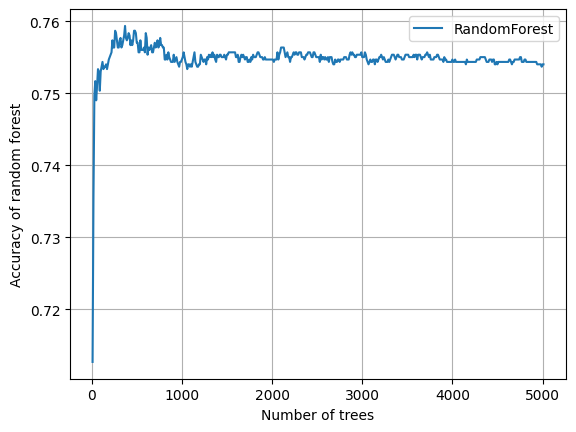

In [44]:
from IPython.display import clear_output

model = RandomForestClassifier(n_estimators = 0, warm_start=True, n_jobs=-1)

step = 10
current_estimators = 0

accuracy = []
estimators = []

def show():
    clear_output(True)
    plt.plot(estimators, accuracy, label="RandomForest")
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy of random forest")

    plt.legend()
    plt.grid()
    plt.show()

for _ in range(0, 5000 // step + 1):
    current_estimators += step
    model.set_params(n_estimators = current_estimators)
    model.fit(X_train, y_train)

    accuracy.append(accuracy_score(y_test, model.predict(X_test)))
    estimators.append(current_estimators)

    show()

По графику сложно сказать, переобучается модель или нет, но так как мы имеем дерево со случайными деревьям, то по сути мы просто постоянно усредняем значение ответа, так что переобучение не происходит, скорее происходит усреднение точности (при n > 1000 точность держится примерно на одном уровне, тогда как при переобучении у нас бы она "прыгала" и постепенно уменьшалась). Но мы можем видеть забавную картину, при n < 500, у нас точность очень хорошая, почти 0.76, а потом начинает падать. Скорее всего это связано с тем, что в начале нам повезло и попались хорошие деревья, а потом RandomForest начал усредняться.